These lines of code utilize the pip package manager to install multiple Python libraries and packages, employing the --quiet flag to minimize the verbosity of the installation process output.


In [ ]:
!pip install gradio --quiet
!pip install xformer --quiet
!pip install chromadb --quiet
!pip install langchain --quiet
!pip install accelerate --quiet
!pip install transformers --quiet
!pip install bitsandbytes --quiet
!pip install unstructured --quiet
!pip install sentence-transformers --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.8/304.8 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 92.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 9.6 MB/

In [ ]:
!pip uninstall typing-extensions
!pip install typing-extensions


Found existing installation: typing_extensions 4.9.0
Uninstalling typing_extensions-4.9.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/typing_extensions-4.9.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/typing_extensions.py
Proceed (Y/n)? Y
  Successfully uninstalled typing_extensions-4.9.0
  Using cached typing_extensions-4.9.0-py3-none-any.whl (32 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires kaleido, which is not installed.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.9.0 which is incompatible.


The script imports a diverse set of libraries and modules to establish an environment for advanced natural language processing and text generation tasks. It focuses on incorporating PyTorch for deep learning, Gradio for interactive ML model interfaces, LangChain for prompt templates, chain models, text embeddings, and document loaders. Additionally, it seamlessly integrates the Transformers library for leveraging Hugging Face's state-of-the-art models across various NLP applications.

In [ ]:
import torch
#import gradio as gr

from textwrap import fill
from IPython.display import Markdown, display

from langchain.prompts.chat import (
    ChatPromptTemplate,
    HumanMessagePromptTemplate,
    SystemMessagePromptTemplate,
    )

from langchain import PromptTemplate
from langchain import HuggingFacePipeline

from langchain.vectorstores import Chroma
from langchain.schema import AIMessage, HumanMessage
from langchain.memory import ConversationBufferMemory
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.document_loaders import UnstructuredMarkdownLoader, UnstructuredURLLoader
from langchain.chains import LLMChain, SimpleSequentialChain, RetrievalQA, ConversationalRetrievalChain

from transformers import BitsAndBytesConfig, AutoModelForCausalLM, AutoTokenizer, GenerationConfig, pipeline

import warnings
warnings.filterwarnings('ignore')

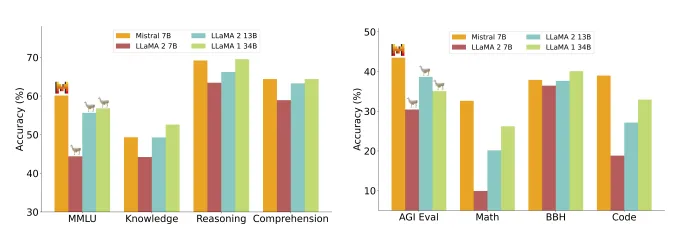

Performance of Mistral 7B and different Llama models on a wide range of benchmarks.

In [ ]:
MODEL_NAME = "mistralai/Mistral-7B-Instruct-v0.1"

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_use_double_quant=True,
)

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME, use_fast=True)
tokenizer.pad_token = tokenizer.eos_token

model = AutoModelForCausalLM.from_pretrained(
    MODEL_NAME, torch_dtype=torch.float16,
    trust_remote_code=True,
    device_map="auto",
    quantization_config=quantization_config
)

generation_config = GenerationConfig.from_pretrained(MODEL_NAME)
generation_config.max_new_tokens = 1024
generation_config.temperature = 0.0001
generation_config.top_p = 0.95
generation_config.do_sample = True
generation_config.repetition_penalty = 1.15

pipeline = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    return_full_text=True,
    generation_config=generation_config,
)

tokenizer_config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

The HuggingFacePipeline class facilitates the local execution of Hugging Face models and provides access to a diverse array of pre-trained machine learning models available on the Hugging Face Model Hub. In the context of our LangChain environment, this class serves as a local wrapper for interacting with Hugging Face models.

In [ ]:
llm = HuggingFacePipeline(
    pipeline=pipeline,
    )

Before connecting to our private data we query the base LLMs

#Now we will load our vector DB with , the data which we will extract from URLs

In [ ]:
#code to parse crawler log file,
import re

# Specify the path to your log file
log_file_path = '/content/drive/MyDrive/crawler_log.txt'#change the path according to your file

# Define a function to extract URLs from the log file
def extract_urls_from_log(log_file_path):
    urls = []
    with open(log_file_path, 'r') as file:
        log_content = file.read()

        # Use regular expression to find URLs in the log content
        url_pattern = re.compile(r'URL:(.*?)\n', re.DOTALL)
        matches = url_pattern.findall(log_content)

        # Extract the URLs from the matches
        for match in matches:
            url = match.strip()
            urls.append(str(url))

    return urls

# Call the function to get the URLs
url_array = extract_urls_from_log(log_file_path)

# Print the extracted URLs
print(url_array)


['https://www.bloomberg.com/news/articles/2023-12-19/citi-suit-raises-metoo-allegations-at-wall-street-s-top-levels', 'https://www.bloomberg.com/notices/tos', 'https://www.bloomberg.com/feedback', 'https://en.wikipedia.org/wiki/Wall_Street_(disambiguation)', 'https://www.nyse.com/index', 'https://stats.wikimedia.org/#%2Fen.wikipedia.org', 'https://www.businessinsider.com/ex-wall-street-accountant-stripper-how-much-make-holidays-2023-12', 'https://en.wikipedia.org/wiki/Wall_Street_(1987_film)', 'https://en.wikipedia.org/wiki/Wall_Street_(photograph)', 'https://www.cnbc.com/2023/12/19/wall-streets-favorite-2024-technology-picks-.html', 'https://fr.wikipedia.org/wiki/Wall_Street_(homonymie)', 'https://e.nyse.com/mac-desk-fed-recap', 'https://www.wikimediafoundation.org/', 'https://www.coindesk.com/markets/2023/12/19/bitcoin-spot-etf-biggest-development-on-wall-street-in-last-30-years-says-michael-saylor/', 'https://en.wikipedia.org/wiki/The_Black_Wall_Street_(disambiguation)', 'https://ww

Now, establish an embedding model for semantic search.

Utilize the GTE embedding model from Alibaba DAMO Academy on Hugging Face.

The model, GTE, is hosted on Hugging Face Hub and is both free and robust.

Implement the HuggingFaceEmbeddings class, a local pipeline wrapper, to interact with the GTE model for our task.

In [ ]:
embeddings = HuggingFaceEmbeddings(
    model_name="thenlper/gte-large",
    model_kwargs={"device": "cuda"},
    encode_kwargs={"normalize_embeddings": True},
)

.gitattributes:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/67.9k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/619 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/670M [00:00<?, ?B/s]

onnx/config.json:   0%|          | 0.00/632 [00:00<?, ?B/s]

model.onnx:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

onnx/special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

onnx/tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

onnx/tokenizer_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

onnx/vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/670M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

#This template is customizable based on the domain of the Urls you have crawled.

#Here I have crawled urls regarding "US Stock Market"



Now we will query our base LLm

In [ ]:
#change the prompt template according to your domain knowledge extracted
template = """
[INST] <>
Act as a Stock Market analyst who is providing information to common people to their questions.
<>

{text} [/INST]
"""

prompt = PromptTemplate(
    input_variables=["text"],
    template=template,
)


In [ ]:
#Query after connecting without vector Db
query = "Is the inflation currently easing?"
result = llm(prompt.format(text=query))

display(Markdown(f"<b>{query}</b>"))
display(Markdown(f"<p>{result}</p>"))

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


<b>Is the inflation currently easing?</b>

<p>As of my knowledge up to October 2021, it appears that inflation rates are gradually decreasing in some countries, but overall, they remain high. Inflation refers to an increase in prices for goods and services over time. The rate of inflation varies from country to country and can be influenced by factors such as changes in supply and demand, government policies, and global economic conditions. It's important to note that while inflation may seem like a negative thing, moderate inflation is generally considered healthy for the economy, as it indicates growth and stability. However, if inflation becomes too high or persistent, it can lead to higher costs of living and reduced purchasing power for individuals and businesses.</p>

#Now we will connect the base LLM model to our, Vector Db store.

In [ ]:
loader = UnstructuredURLLoader(urls=url_array)
documents = loader.load()

len(documents)
# Output

37

8 loaded documents with data and that might just stretch our Mistral-7b LLM’s context window. To keep everything in check, we’re breaking them into 21 smaller documents or chunks, each with a 1024-token limit. Additionally, we’ve set the chunk overlap size to 64 to ensure there’s some context continuity between consecutive chunks.

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1024, chunk_overlap=64)
texts_chunks = text_splitter.split_documents(documents)

len(texts_chunks)

697


Once we have organized our data into manageable chunks, the subsequent action involves embedding and indexing these chunks within Chromdb, our vector store.

In [ ]:
db = Chroma.from_documents(texts_chunks, embeddings, persist_directory="db")

Tweaking the Prompt Template, so better match the needs

In [ ]:
template = """
[INST] <>
Act as an Stock market expert. Use the following information to answer the question at the end.
<>

{context}

{question} [/INST]
"""

prompt = PromptTemplate(template=template, input_variables=["context", "question"])

qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=db.as_retriever(search_kwargs={"k": 2}),  #outputs two relevant chunks
    return_source_documents=True,
    chain_type_kwargs={"prompt": prompt},
)

Now that we have connected out LLM to vector store we can now test it.

In [ ]:
#Query after connecting with vector Db
query = "Is the inflation currently easing?"
result_ = qa_chain(
    query
)
print(result_)
result = result_["result"].strip()


display(Markdown(f"<b>{query}</b>"))
display(Markdown(f"<p>{result}</p>"))

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


{'query': 'Is the inflation currently easing?', 'result': "It appears that there are signs that the labor market is improving and the Federal Reserve's anti-inflation interest rate hikes may be having their desired impact. However, it is important to note that the latest weekly jobless claims data showed only a small increase from the previous week, and the upcoming monthly US jobs report will provide further insight into the state of the labor market and inflation. Additionally, the median projection for rates at the end of the next year was 4.6% in the Summary of Economic Projections, indicating that markets expect some level of inflationary pressure even if it is easing.", 'source_documents': [Document(page_content="Signs this week that the labor market is finally getting back to normal point to the Federal Reserve's anti-inflation interest rate hikes as having their desired impact. With a soft landing for the economy looking more likely, traders have been betting on a Fed policy sh

<b>Is the inflation currently easing?</b>

<p>It appears that there are signs that the labor market is improving and the Federal Reserve's anti-inflation interest rate hikes may be having their desired impact. However, it is important to note that the latest weekly jobless claims data showed only a small increase from the previous week, and the upcoming monthly US jobs report will provide further insight into the state of the labor market and inflation. Additionally, the median projection for rates at the end of the next year was 4.6% in the Summary of Economic Projections, indicating that markets expect some level of inflationary pressure even if it is easing.</p>

#Comparison


#Without VectorDb Store Connection

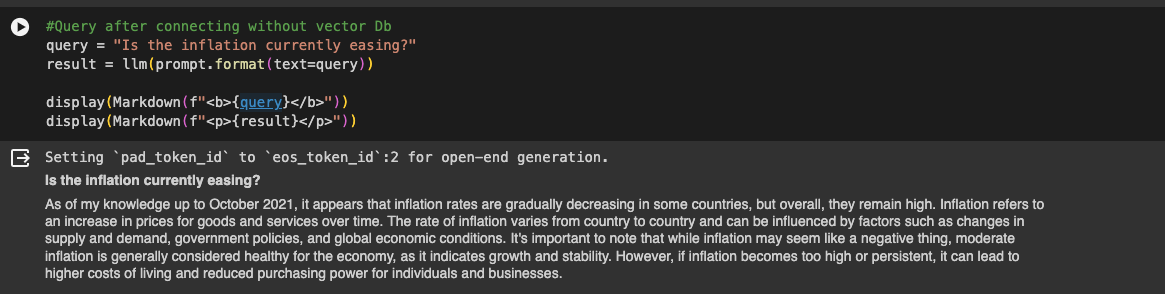


#With VectorDb Store Connection

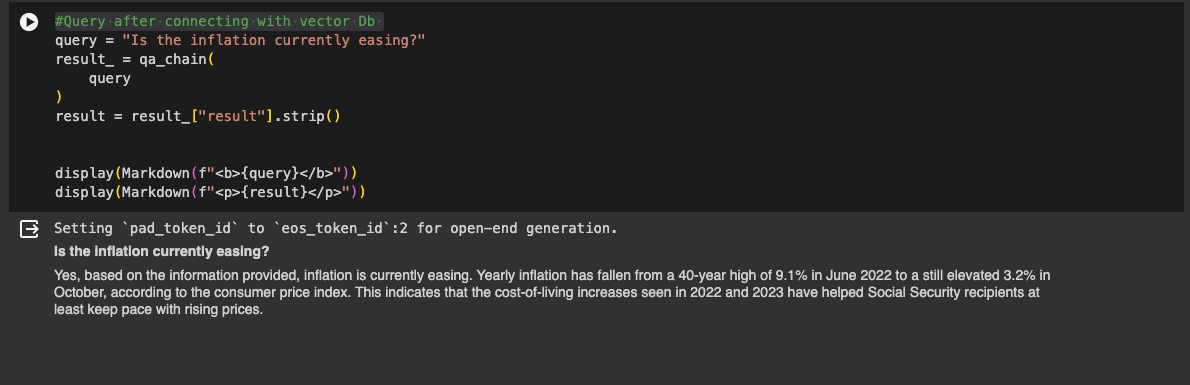





In [ ]:
#below we pribt the source docs in Vector Db store where it refrenced the data from
result_["source_documents"]

[Document(page_content="Signs this week that the labor market is finally getting back to normal point to the Federal Reserve's anti-inflation interest rate hikes as having their desired impact. With a soft landing for the economy looking more likely, traders have been betting on a Fed policy shift to cut rates.\n\nRead more: What the Fed rate-hike pause means for bank accounts, CDs, loans, and credit cards\n\nTech stocks led the gains with Alphabet (GOOGL) shares surging more than 5% after the company launched new AI initiatives.\n\nThe latest weekly jobless claims data revealed 220,000 claims were filed in the week ending Dec. 2. The number came in line with what economists surveyed by Bloomberg had expected and was up just 2,000 from the week prior, largely reflecting limited increases in layoffs.\n\nBut the crucial monthly US jobs report on Friday will be the real test of inflation and interest rate expectations before the Fed's last meeting of the year next week.\n\nLive coverage i


In practical situations, ongoing chat interactions prove valuable, especially in the context of conversational AI assistants. This functionality allows users to engage in natural, flowing conversations with the model, retaining a history of the chat for contextual reference. Users can implicitly refer to previous discussions or bring up topics from past chats, creating a conversational experience akin to interacting with a friendly and helpful AI companion!

To implement this, we start by adjusting the prompt template and utilize ConversationBufferMemory to store and retrieve the conversation messages in-memory. Subsequently, we incorporate the ConversationalRetrievalChain, connecting our language model, Mistral-7b, with the vector database and chat history. This integration aims to elevate the overall user conversation experience.

In [ ]:
custom_template = """You are an Stock Market Analyst Expert. Given the
following conversation and a follow up question, rephrase the follow up question
to be a standalone question. At the end of standalone question add this
'Answer the question in English language.' If you do not know the answer reply with 'I dont have enough information this'.
Chat History:
{chat_history}
Follow Up Input: {question}
Standalone question:
"""

CUSTOM_QUESTION_PROMPT = PromptTemplate.from_template(custom_template)

memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)

qa_chain = ConversationalRetrievalChain.from_llm(
    llm=llm,
    retriever=db.as_retriever(search_kwargs={"k": 2}),
    memory=memory,
    condense_question_prompt=CUSTOM_QUESTION_PROMPT,
)

We will ask multiple questions to the model

In [ ]:
#Query-1
query = "What are the best stock to invest in during times of easing inflation, should we be cautious"
result_ = qa_chain({"question": query})
result = result_["answer"].strip()

display(Markdown(f"<b>{query}</b>"))
display(Markdown(f"<p>{result}</p>"))

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


<b>What are the best stock to invest in during times of easing inflation, should we be cautious</b>

<p>During times of easing inflation, it is generally recommended to invest in stocks that have historically performed well during periods of low inflation. These may include technology companies such as Google, Meta, Amazon, Tesla, and Microsoft, which tend to benefit from lower interest rates and increased consumer spending. Additionally, sectors such as healthcare, utilities, and consumer staples may also perform well during times of low inflation. However, it is important to note that past performance does not guarantee future results, and investors should always conduct their own research before making any investment decisions. It is also advisable to diversify your portfolio across different asset classes and industries to minimize risk.</p>

In [ ]:
#Query-2
query = "is inflation easing?"
result_ = qa_chain({"question": query})
result = result_["answer"].strip()

display(Markdown(f"<b>{query}</b>"))
display(Markdown(f"<p>{result}</p>"))

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


<b>is inflation easing?</b>

<p>No, it isn't.</p>

In [ ]:
#Query-3
query = "What is the current inflation rate can ypu provide me with the figure?"
result_ = qa_chain({"question": query})
result = result_["answer"].strip()

display(Markdown(f"<b>{query}</b>"))
display(Markdown(f"<p>{result}</p>"))

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


<b>What is the current inflation rate can ypu provide me with the figure?</b>

<p>I don't have access to real-time data, but according to the text, the core-PCE (Personal Consumption Expenditures) is not expected to hit the Fed’s 2% target until 2026.</p>

In [ ]:
memory.chat_memory.messages

[HumanMessage(content='What are the best stock to invest in during times of easing inflation, should we be cautious'),
 AIMessage(content=' During times of easing inflation, it is generally recommended to invest in stocks that have historically performed well during periods of low inflation. These may include technology companies such as Google, Meta, Amazon, Tesla, and Microsoft, which tend to benefit from lower interest rates and increased consumer spending. Additionally, sectors such as healthcare, utilities, and consumer staples may also perform well during times of low inflation. However, it is important to note that past performance does not guarantee future results, and investors should always conduct their own research before making any investment decisions. It is also advisable to diversify your portfolio across different asset classes and industries to minimize risk.'),
 HumanMessage(content='is inflation easing?'),
 AIMessage(content=' Yes, it seems like inflation is easing 

#Gradio UI Chat Interface

In [ ]:

def query_llm_with_vector(query, history):
  memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)

  qa_chain = ConversationalRetrievalChain.from_llm(
      llm=llm,
      retriever=db.as_retriever(search_kwargs={"k": 2}),
      memory=memory,
      condense_question_prompt=CUSTOM_QUESTION_PROMPT,
  )

  result = qa_chain({"question": query})
  return result["answer"].strip()


In [ ]:
import gradio as gr

In [ ]:

iface = gr.ChatInterface(
    fn = query_llm_with_vector,
    chatbot=gr.Chatbot(height=600),
    textbox=gr.Textbox(placeholder="What is Inflation?", container=False, scale=7),
    title="Customize Mistral-7B",
    theme="soft",
    examples=["What is Current Inflation rate in USA?"],


    cache_examples=True,
    retry_btn="Retry",
    undo_btn="Undo",
    clear_btn="Clear",
    submit_btn="Submit"

    )

iface.launch(share=True)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Caching examples at: '/content/gradio_cached_examples/34'
Caching example 1/1
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://cae297ef6ce3114385.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
